In [28]:
import os
os.getcwd()

'C:\\Users\\laasy\\Desktop\\datasets'

In [29]:
os.chdir("C:/Users/laasy/Desktop/datasets")

In [30]:
os.getcwd()

'C:\\Users\\laasy\\Desktop\\datasets'

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.stats.stats import pearsonr
import seaborn as sb

In [32]:
data1=pd.read_excel('Sample Auctions_Data_Set_1.xlsx')

In [33]:
data1

,RecID,AuctionCurrency,AuctionDate,AuctionID,Indicator-Day-Afternoon,Auction Title,Auction House,AuctionLocation,lot LotNo,artwork ID,Artwork Title,ArtworkCategory,Artist_Full_Name,lot_EstimateHigh,lot_EstimateLow,SalePrice,LotStatus
0,2547,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,1,6998013,Untitled,PAINTINGS,Christopher Wool,600000,400000,729000.0,Sold
1,2548,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,10,6998014,Angel Of The North,SCULPTURE,Antony Gormley,2000000,1500000,2860600.0,Sold
2,2549,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,11,6998015,Some People (Welcome Series),PAINTINGS,Hurvin Anderson,800000,600000,1029000.0,Sold
3,2550,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,12,6998016,The Architect's Home In The Ravine,PAINTINGS,Peter Doig,18000000,14000000,14376400.0,Sold
4,2551,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,13,6998017,A Swan Comforting A Snake,PAINTINGS,Cecily Brown,1500000,1000000,1209000.0,Sold
5,2552,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,14,6998018,Eifrau Die Man Nicht Schubladieren Kann (Egg L...,PAINTINGS,Martin Kippenberger,3000000,2000000,2169000.0,Sold
6,2553,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,15,6998019,Memory Ware Flat #29,PAINTINGS,Mike Kelley,2000000,1500000,1689000.0,Sold
7,2554,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,16,6998020,Yellow Cell With Triple Conduit,PAINTINGS,Peter Halley,350000,250000,513000.0,Sold
8,2555,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,17,6998021,Untitled,SCULPTURE,Richard Prince,1500000,1000000,2049000.0,Sold
9,2556,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,18,6998022,Nov. 8,PAINTINGS,On Kawara,800000,600000,789000.0,Sold


In [34]:
data1.describe()

,RecID,AuctionID,lot LotNo,artwork ID,lot_EstimateHigh,lot_EstimateLow,SalePrice
count,111.000000,111.000000,111.000000,1.110000e+02,1.110000e+02,1.110000e+02,9.900000e+01
mean,2602.000000,22.450450,28.522523,6.998403e+06,1.728018e+06,1.234955e+06,2.091090e+06
std,32.186954,0.499795,16.556705,3.994203e+02,2.872545e+06,2.072786e+06,4.856774e+06
min,2547.000000,22.000000,1.000000,6.998013e+06,9.000000e+04,7.000000e+04,9.300000e+04
25%,2574.500000,22.000000,14.500000,6.998040e+06,4.500000e+05,3.000000e+05,4.290000e+05
50%,2602.000000,22.000000,28.000000,6.998068e+06,7.000000e+05,5.000000e+05,7.290000e+05
75%,2629.500000,23.000000,42.000000,6.998838e+06,1.800000e+06,1.300000e+06,1.779000e+06
max,2657.000000,23.000000,61.000000,6.998866e+06,1.800000e+07,1.400000e+07,4.185900e+07


In [35]:
data1['lot_EstimateHigh'].max()

18000000

In [36]:
data1['ArtworkCategory'].value_counts()

PAINTINGS         74
SCULPTURE         22
WORKS ON PAPER     7
PHOTOGRAPHS        6
TEXTILES           1
PRINTS             1
Name: ArtworkCategory, dtype: int64

In [37]:
data1.apply(lambda x:sum(x.isnull()),axis=0)

RecID                       0
AuctionCurrency             0
AuctionDate                 0
AuctionID                   0
Indicator-Day-Afternoon     0
Auction Title               0
Auction House               0
AuctionLocation             0
lot LotNo                   0
artwork ID                  0
Artwork Title               0
ArtworkCategory             0
Artist_Full_Name            0
lot_EstimateHigh            0
lot_EstimateLow             0
SalePrice                  12
LotStatus                   0
dtype: int64

In [38]:
data1.mean()

RecID               2.602000e+03
AuctionID           2.245045e+01
lot LotNo           2.852252e+01
artwork ID          6.998403e+06
lot_EstimateHigh    1.728018e+06
lot_EstimateLow     1.234955e+06
SalePrice           2.091090e+06
dtype: float64

In [39]:
data1.max()

RecID                                                  2657
AuctionCurrency                                         GBP
AuctionDate                             2018-03-08 00:00:00
AuctionID                                                23
Indicator-Day-Afternoon    Contemporary Art Evening Auction
Auction Title              Contemporary Art Evening Auction
Auction House                                     Sotheby's
AuctionLocation                                      London
lot LotNo                                                61
artwork ID                                          6998866
Artwork Title               Yellow Cell With Triple Conduit
ArtworkCategory                              WORKS ON PAPER
Artist_Full_Name                                 Yves Klein
lot_EstimateHigh                                   18000000
lot_EstimateLow                                    14000000
SalePrice                                        4.1859e+07
LotStatus                               

In [40]:
data1.min()

RecID                                                              2547
AuctionCurrency                                                     GBP
AuctionDate                                         2018-03-07 00:00:00
AuctionID                                                            22
Indicator-Day-Afternoon    20th Century & Contemporary Art Evening Sale
Auction Title              20th Century & Contemporary Art Evening Sale
Auction House                                                  Phillips
AuctionLocation                                                  London
lot LotNo                                                             1
artwork ID                                                      6998013
Artwork Title                                               1025 Farben
ArtworkCategory                                               PAINTINGS
Artist_Full_Name                                          Adrian Ghenie
lot_EstimateHigh                                                

In [41]:
data1['Artist_Full_Name'].value_counts()

Lucio Fontana              5
Damien Hirst               5
Andy Warhol                5
Albert Oehlen              4
Richard Prince             4
Gerhard Richter            4
Jean-Michel Basquiat       3
Rudolf Stingel             3
Sigmar Polke               3
Cindy Sherman              2
Peter Doig                 2
Cecily Brown               2
Michelangelo Pistoletto    2
Wolfgang Tillmans          2
Christopher Wool           2
Henry Moore                2
David Hockney              2
Max Ernst                  2
Alighiero e Boetti         2
Gunther Uecker             2
Josef Albers               2
Rosemarie Trockel          1
Peter Halley               1
Jean Dubuffet              1
Luciano Fabro              1
Jesus Rafael Soto          1
Cy Twombly                 1
Yves Klein                 1
Wassily Kandinsky          1
Jason Rhoades              1
                          ..
Pablo Picasso              1
Antony Gormley             1
Alexander Calder           1
Laura Owens   

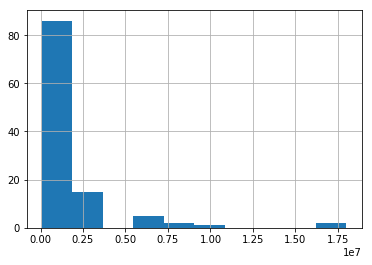

In [42]:
data1['lot_EstimateHigh'].hist(bins=10)

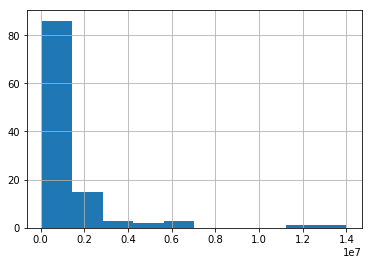

In [43]:
data1['lot_EstimateLow'].hist(bins=10)

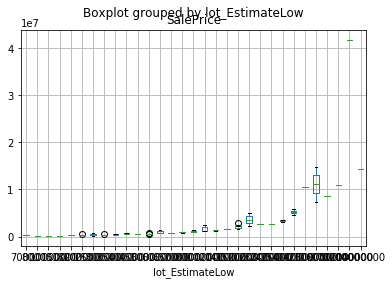

In [44]:
data1.boxplot(column='SalePrice',by='lot_EstimateLow')

In [45]:
dk=data1.groupby(['ArtworkCategory','SalePrice'])
dk

In [46]:
data1.groupby('ArtworkCategory').SalePrice.max()

ArtworkCategory
PAINTINGS         41859000.0
PHOTOGRAPHS        1029000.0
PRINTS             2349000.0
SCULPTURE         14859000.0
TEXTILES            381000.0
WORKS ON PAPER     1029000.0
Name: SalePrice, dtype: float64

In [47]:
data1.groupby('ArtworkCategory').agg(['mean','median','max'])

RecID                AuctionID             lot LotNo  \
                        mean  median   max       mean median max       mean   
ArtworkCategory                                                               
PAINTINGS        2601.918919  2601.5  2657  22.445946   22.0  23  27.229730   
PHOTOGRAPHS      2605.000000  2607.0  2632  22.500000   22.5  23  30.666667   
PRINTS           2595.000000  2595.0  2595  22.000000   22.0  22  53.000000   
SCULPTURE        2592.727273  2580.5  2655  22.363636   22.0  23  28.409091   
TEXTILES         2599.000000  2599.0  2599  22.000000   22.0  22  57.000000   
WORKS ON PAPER   2630.857143  2636.0  2650  22.857143   23.0  23  33.142857   

                              artwork ID     ...               \
                median max          mean     ...          max   
ArtworkCategory                              ...                
PAINTINGS           26  59  6.998399e+06     ...      6998866   
PHOTOGRAPHS         35  61  6.998442e+06     ...      6998841   
PRINTS              53  53  6.998061e+06     ...      6998061   
SCULPTURE           31  60  6.998329e+06     ...      6998864   
TEXTILES            57  57  6.998065e+06     ...      6998065   
WORKS ON PAPER      30  58  6.998734e+06     ...      6998859   

                lot_EstimateHigh                    lot_EstimateLow           \
                            mean   median       max            mean   median   
ArtworkCategory                                                                
PAINTINGS           2.113378e+06   825000  18000000    1.516486e+06   625000   
PHOTOGRAPHS         4.166667e+05   300000    900000    2.916667e+05   200000   
PRINTS              1.500000e+06  1500000   1500000    1.000000e+06  1000000   
SCULPTURE           1.241818e+06   600000   7000000    8.754545e+05   400000   
TEXTILES            3.500000e+05   350000    350000    2.500000e+05   250000   
WORKS ON PAPER      5.357143e+05   450000   1200000    3.714286e+05   350000   

                              SalePrice                         
                      max          mean     median         max  
ArtworkCategory                                                 
PAINTINGS        14000000  2.471386e+06   933000.0  41859000.0  
PHOTOGRAPHS        700000  4.186667e+05   309000.0   1029000.0  
PRINTS            1000000  2.349000e+06  2349000.0   2349000.0  
SCULPTURE         5000000  1.764847e+06   501000.0  14859000.0  
TEXTILES           250000  3.810000e+05   381000.0    381000.0  
WORKS ON PAPER     800000  5.322000e+05   429000.0   1029000.0  

[6 rows x 21 columns]

In [48]:
data1.dtypes

RecID                               int64
AuctionCurrency                    object
AuctionDate                datetime64[ns]
AuctionID                           int64
Indicator-Day-Afternoon            object
Auction Title                      object
Auction House                      object
AuctionLocation                    object
lot LotNo                           int64
artwork ID                          int64
Artwork Title                      object
ArtworkCategory                    object
Artist_Full_Name                   object
lot_EstimateHigh                    int64
lot_EstimateLow                     int64
SalePrice                         float64
LotStatus                          object
dtype: object

In [49]:
df=pd.DataFrame([data1.ArtworkCategory,data1.lot_EstimateHigh,data1.lot_EstimateLow,data1.SalePrice,data1.LotStatus])

In [50]:
data2=df.transpose()

In [51]:
p1=data1['lot_EstimateLow'].mean()
p2=data1['lot_EstimateLow'].median()
p3=data1['lot_EstimateLow'].mode()
print(p1,p2,p3)

1234954.954954955 500000.0 0    250000
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236FA87D518>]],
      dtype=object)

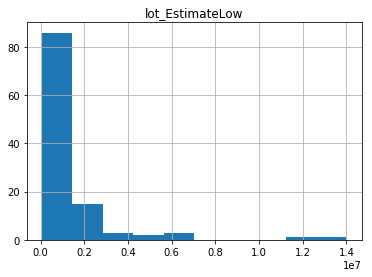

In [52]:
data1.hist('lot_EstimateLow')

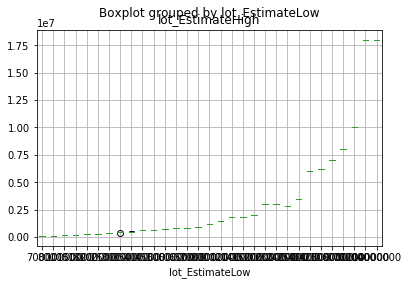

In [53]:
data1.boxplot(column='lot_EstimateHigh',by='lot_EstimateLow')

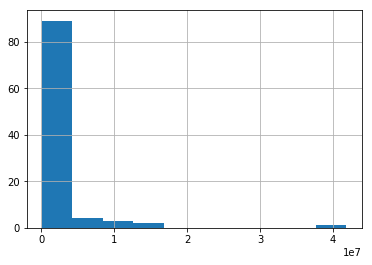

In [54]:
data1['SalePrice'].hist(bins=10)

In [58]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
labelencoder=LabelEncoder() 
df['LotStatus']=labelencoder.fit_transform(df['LotStatus']) 
df 
 

KeyError: 'LotStatus'

In [57]:
df['SalePrice'].isna().sum()

KeyError: 'SalePrice'